In [5]:
using PowerSimulationsDynamics
using PowerSystemCaseBuilder
using PowerSystems
using Sundials
using Plots
using OrdinaryDiffEq
using DataFrames, CSV
PSD = PowerSimulationsDynamics ;

# documentation 1: https://github.com/NREL-SIIP/SIIPExamples.jl
# documentation 2: https://nrel-siip.github.io/PowerSystems.jl/stable/modeler_guide/system/
# documentation 3: https://nrel-siip.github.io/PowerSimulations.jl/stable/

In [48]:
# code to build a system and get some data
sys = build_system(PSSETestSystems, "psse_240_case_renewable_sys") ;
Y = Ybus(sys) ;
Matrix(Y.data) ;
PV = [b for b in get_components(Bus, sys) if b.bustype == BusTypes.PV] ;

┌ Warning: Invalid range
│   valid_info.struct_name = Bus
│   field_name = magnitude
│   valid_range = voltage_limits
│   valid_info.ist_struct = Bus(6433, VALMY       -6433, BusTypes.PV = 3, 0.07877019980100809, 1.11102, (min = 0.9, max = 1.1), 20.0, Area(1, 0.0, 0.0, 0.0), LoadZone(9, 86.44099109859998, 11.15561395759438), Dict{String, Any}())
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:222
┌ Warning: Invalid range
│   valid_info.struct_name = Bus
│   field_name = magnitude
│   valid_range = voltage_limits
│   valid_info.ist_struct = Bus(2901, ELDORADO    -2901, BusTypes.PQ = 2, -0.1713215193757634, 1.10737, (min = 0.9, max = 1.1), 500.0, Area(2, 0.0, 0.0, 0.0), LoadZone(2, 387.5043963071, 42.70636878620003), Dict{String, Any}())
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:222
┌ Warning: Invalid range
│   valid_info.struct_name = Bus
│   field_name = magnitu

┌ Warning: Invalid range
│   valid_info.struct_name = Line
│   field_name = x
│   valid_range = Dict{String, Any}("max" => 4, "min" => 0)
│   valid_info.ist_struct = Line(MIDWAY      -3803-GATES1      -3891-i_1, true, 0.0, 0.0, Arc(Bus(3803, MIDWAY      -3803, BusTypes.PQ = 2, -0.1217646405946364, 1.04618, (min = 0.9, max = 1.1), 500.0, Area(2, 0.0, 0.0, 0.0), LoadZone(2, 387.5043963071, 42.70636878620003), Dict{String, Any}()), Bus(3891, GATES1      -3891, BusTypes.PQ = 2, -0.1587638754076642, 1.05218, (min = 0.9, max = 1.1), 500.0, Area(2, 0.0, 0.0, 0.0), LoadZone(2, 387.5043963071, 42.70636878620003), Dict{String, Any}())), 2.0e-5, -0.00998, (from = 0.0, to = 0.0), 121.24249863432334, (min = -1.0472, max = 1.0472), Service[], Dict{String, Any}())
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:222
┌ Warning: Invalid range
│   valid_info.struct_name = Line
│   field_name = x
│   valid_range = Dict{String, Any}("max" => 4, "m

┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemant

┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemant

┌ Warning: Invalid range
│   valid_info.struct_name = ThermalStandard
│   field_name = active_power_limits
│   valid_range = Dict{String, Any}("max" => nothing, "min" => 0)
│   valid_info.ist_struct = ThermalStandard(generator-3835-ND, true, false, Bus(3835, MIDWAY      -3835, BusTypes.PV = 3, -0.11201697672224806, 1.03528, (min = 0.9, max = 1.1), 20.0, Area(2, 0.0, 0.0, 0.0), LoadZone(2, 387.5043963071, 42.70636878620003), Dict{String, Any}()), 0.0, 0.0, 0.005, (min = -5.1, max = 0.0), (min = 0.0, max = 0.005), (up = 0.0, down = 0.0), ThreePartCost(VariableCost{Tuple{Float64, Float64}}((0.0, 1.0)), 0.0, 0.0, 0.0), 100.0, nothing, PrimeMovers.OT = 19, ThermalFuels.OTHER = 14, Service[], 10000.0, DynamicGenerator(generator-3835-ND, 1.0, RoundRotorQuadratic(RoundRotorMachine(0.0, 6.0, 0.5, 1.0, 0.05, 1.4, 1.35, 0.3, 0.6, 0.2, 0.1, (0.03, 0.4), Dict{String, Any}(), 0.5000000000000001, 0.2, 2.5, 1.5999999999999999, 0.9615384615384617, [:eq_p, :ed_p, :ψ_kd, :ψ_kq], 4, InfrastructureSystems.

┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemant

┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemant

┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemantegna/.julia/packages/InfrastructureSystems/bCJWE/src/validation.jl:51
┌ Warning: struct DynamicGenerator does not exist in validation configuration file, validation skipped
└ @ InfrastructureSystems /Users/gabemant

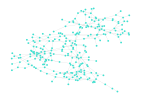

In [67]:
# code to plot the network graph
using LightGraphs, GraphPlot
import SimpleWeightedGraphs, Graphs

function system_to_weighted_graph(sys::System)
    buses = get_components(Bus, sys)
    branches = get_components(Branch, sys)

    n = length(buses)
    g = SimpleWeightedGraphs.SimpleWeightedGraph(n)

    for branch in branches
        arc = get_arc(branch)
        from_bus = arc.from
        to_bus = arc.to

        from = findfirst(==(from_bus.number), [bus.number for bus in buses])
        to = findfirst(==(to_bus.number), [bus.number for bus in buses])
        
        weight = 1 / branch.x  # You can use any appropriate weight metric
        Graphs.add_edge!(g, from, to, weight)
    end

    return g
end

graph = system_to_weighted_graph(sys)
gplot(graph)
